In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

import scipy.cluster.hierarchy as shc

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


In [ ]:
!git clone https://github.com/MinLee0210/-VGU-HDDA-Survey-responses.git

Cloning into '-VGU-HDDA-Survey-responses'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 14 (delta 4), reused 14 (delta 4), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [ ]:
df_path = '/content/-VGU-HDDA-Survey-responses/'
df = pd.read_csv(df_path + 'survey_response.csv')
df.head()

,Timestamp,What is your gender?,Which year are you studying at university?,How long do you usually play game in a day?,What is the main reason you play games?,What kind of games do you usually play?,What device do you use to play game?,Do you prefer playing games alone or with friends?
0,12/9/2022 22:24:35,Male,4,30 minutes,Connect with your friend,"Strategy (LOL, Plant vs Zombie, Tower Defen...",PC / Laptop,Play with friends
1,12/9/2022 22:29:04,Male,3,1 hour,Kill time,"RPG (Elden Ring, God of War, Monster Hunter...",Console,Play with friends
2,12/9/2022 22:30:59,Male,4,3 hours,Kill time,"Survival horror (Dead by daylight, The fore...",PC / Laptop,Play alone
3,12/9/2022 22:31:40,Female,1,30 minutes or less,Kill time,"Simulation (the Sims, Jurassic World , Fall...",PC / Laptop,Play alone
4,12/9/2022 22:48:42,Female,4,30 minutes or less,Kill time,"Puzzle (2048, Brainout, Escape Simulator,...)",Mobile phone,Play alone


In [ ]:
df = df.drop(['Timestamp'], axis=1)
df.head()

,What is your gender?,Which year are you studying at university?,How long do you usually play game in a day?,What is the main reason you play games?,What kind of games do you usually play?,What device do you use to play game?,Do you prefer playing games alone or with friends?
0,Male,4,30 minutes,Connect with your friend,"Strategy (LOL, Plant vs Zombie, Tower Defen...",PC / Laptop,Play with friends
1,Male,3,1 hour,Kill time,"RPG (Elden Ring, God of War, Monster Hunter...",Console,Play with friends
2,Male,4,3 hours,Kill time,"Survival horror (Dead by daylight, The fore...",PC / Laptop,Play alone
3,Female,1,30 minutes or less,Kill time,"Simulation (the Sims, Jurassic World , Fall...",PC / Laptop,Play alone
4,Female,4,30 minutes or less,Kill time,"Puzzle (2048, Brainout, Escape Simulator,...)",Mobile phone,Play alone


In [ ]:
features ={
    "What is your gender?": "Gender", 
    "Which year are you studying at university?": "Year of Studying", 
    "How long do you usually play game in a day?": "Operating time per day", 
    "What is the main reason you play games?": "Reason",
    "What kind of games do you usually play?": "Category",
    "What device do you use to play game?": "Device",
    "Do you prefer playing games alone or with friends?": "Alone/Friend"
}
df = df.rename(columns = features)
df.head()

,Gender,Year of Studying,Operating time per day,Reason,Category,Device,Alone/Friend
0,Male,4,30 minutes,Connect with your friend,"Strategy (LOL, Plant vs Zombie, Tower Defen...",PC / Laptop,Play with friends
1,Male,3,1 hour,Kill time,"RPG (Elden Ring, God of War, Monster Hunter...",Console,Play with friends
2,Male,4,3 hours,Kill time,"Survival horror (Dead by daylight, The fore...",PC / Laptop,Play alone
3,Female,1,30 minutes or less,Kill time,"Simulation (the Sims, Jurassic World , Fall...",PC / Laptop,Play alone
4,Female,4,30 minutes or less,Kill time,"Puzzle (2048, Brainout, Escape Simulator,...)",Mobile phone,Play alone


In [ ]:
mapping_gender = {
    'Male': 0, 
    'Female': 1, 
    'Other': 2
}

df['Gender'] = df['Gender'].map(mapping_gender)

operating_time = np.unique(df['Operating time per day'])
mapping_operating_time = {categories: label for label, categories in enumerate(operating_time)}
print(mapping_operating_time)
df['Operating time per day'] = df['Operating time per day'].map(mapping_operating_time)

reasons = np.unique(df['Reason'])
mapping_reasons = {categories: label for label, categories in enumerate(reasons)}
print(reasons)
df['Reason'] = df['Reason'].map(mapping_reasons)

category = np.unique(df['Category'])
mapping_category = {categories: label for label, categories in enumerate(category)}
print(category)
df['Category'] = df['Category'].map(mapping_category)

device = np.unique(df['Device'])
mapping_device = {categories: label for label, categories in enumerate(device)}
print(device)
df['Device'] = df['Device'].map(mapping_device)

al_fr = np.unique(df['Alone/Friend'])
mapping_al_fr = {categories: label for label, categories in enumerate(al_fr)}
print(al_fr)
df['Alone/Friend'] = df['Alone/Friend'].map(mapping_al_fr)

df.head()

{'1 hour': 0, '2 hours': 1, '3 hours': 2, '30 minutes': 3, '30 minutes or less': 4, 'Over 3 hours': 5}
['Connect with your friend' 'Kill time' 'Plowing the top race']
['Action    (PUBG, Free fire, Cuphead, Shadow fight, Honkai Impact 3rd, ...)'
 'Adventure    (Minecraft, Genshin Impact, Mini World, Roblox, ...)'
 'Other...' 'Puzzle    (2048, Brainout, Escape Simulator,...)'
 "RPG    (Elden Ring, God of War, Monster Hunter, Assassin's Creed,...)"
 'Simulation    (the Sims, Jurassic World , Fallout Shelter,...)'
 'Sport    (Forza Horizon, FIFA, NBA,...)'
 'Strategy    (LOL, Plant vs Zombie, Tower Defense, Warcraft, Civilization,...)'
 'Survival horror    (Dead by daylight, The forest, Outlast, Left 4 dead,...)']
['Console' 'Mobile phone' 'PC / Laptop' 'VR devices']
['Play alone' 'Play with friends']


,Gender,Year of Studying,Operating time per day,Reason,Category,Device,Alone/Friend
0,0,4,3,0,7,2,1
1,0,3,0,1,4,0,1
2,0,4,2,1,8,2,0
3,1,1,4,1,5,2,0
4,1,4,4,1,3,1,0


In [ ]:
df.shape

(117, 7)

In [ ]:
df.describe()

,Gender,Year of Studying,Operating time per day,Reason,Category,Device,Alone/Friend
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.615385,2.264957,2.555556,0.948718,3.794872,1.410256,0.418803
std,0.797044,1.255286,1.913854,0.786153,2.917068,0.696715,0.495485
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,2.000000,2.000000,1.000000,4.000000,1.000000,0.000000
75%,1.000000,4.000000,4.000000,2.000000,7.000000,2.000000,1.000000
max,2.000000,4.000000,5.000000,2.000000,8.000000,3.000000,1.000000


<h1> TRAINING MODEL WITH NORMALIZATION </h1>

In [ ]:
def _plot_kmean_scatter(X, labels):

    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=150, c=palette[labels.astype(np.int)])

    txts = []

    for i in range(num_classes):
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')
    plt.grid()

In [ ]:
df = df.dropna()
X = np.array(df.iloc[: 117, :]).astype(np.float32)
X = Normalizer().fit_transform(X)
X.shape

(117, 7)

Text(0, 0.5, 'dissimilarity metric cluster')

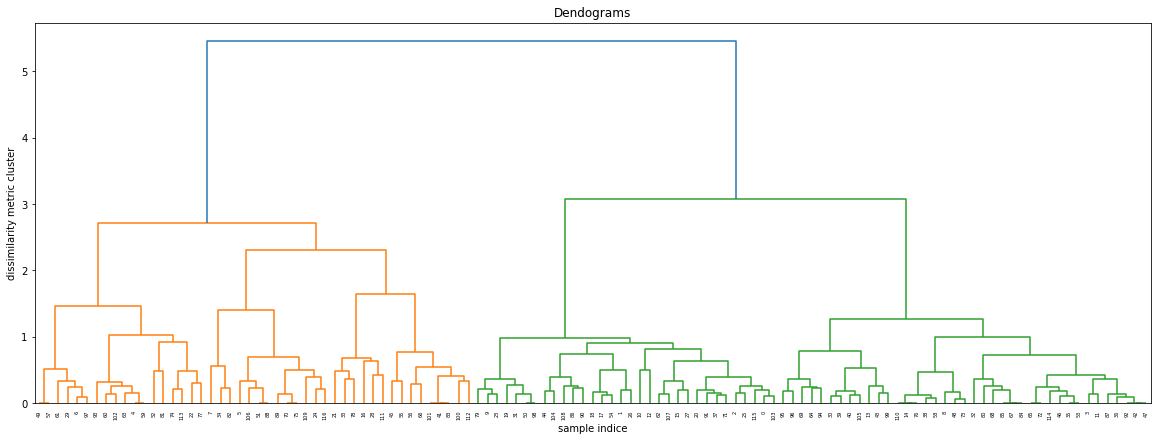

In [ ]:
plt.figure(figsize=(20, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(28, linestyle='--')
plt.xlabel('sample indice')
plt.ylabel('dissimilarity metric cluster')

Text(0, 0.5, 'dissimilarity metric cluster')

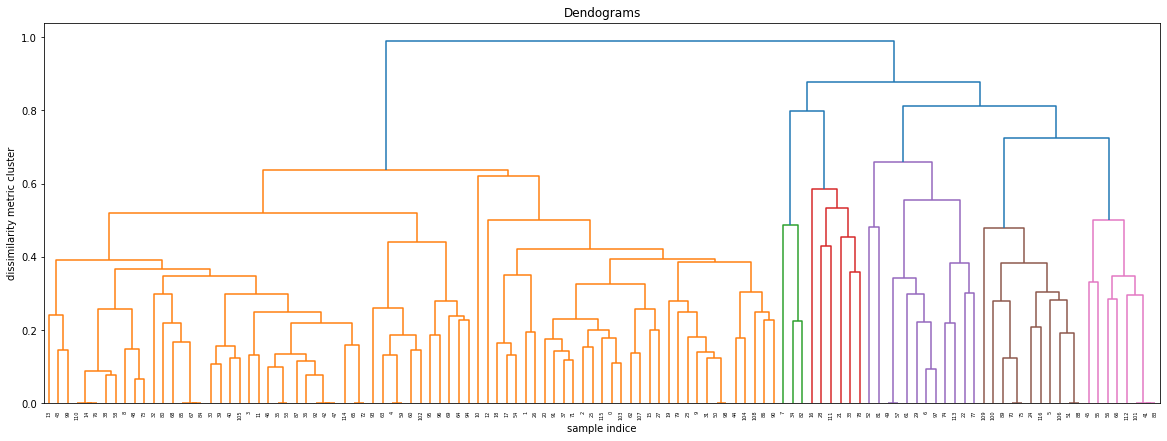

In [ ]:
plt.figure(figsize=(20, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='average'))
plt.xlabel('sample indice')
plt.ylabel('dissimilarity metric cluster')

Text(0, 0.5, 'dissimilarity metric cluster')

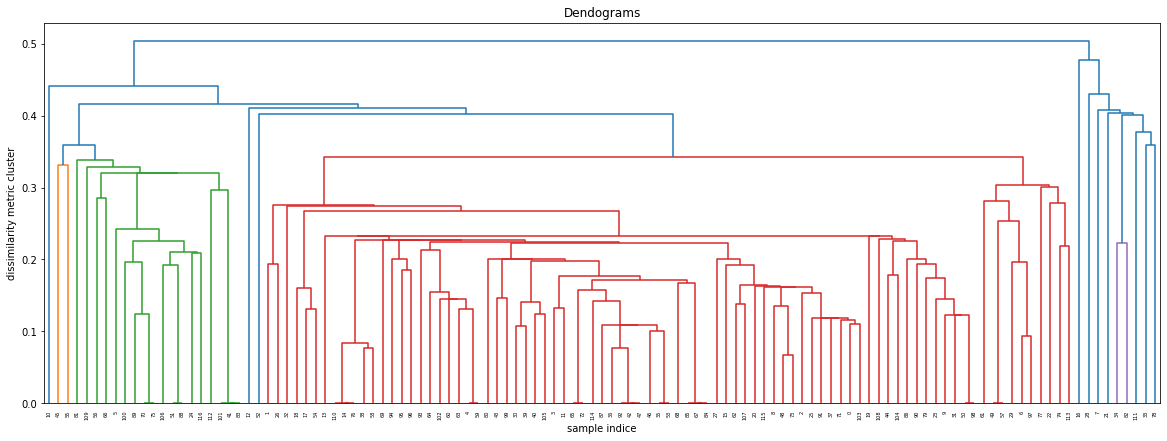

In [ ]:
plt.figure(figsize=(20, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='single'))
plt.xlabel('sample indice')
plt.ylabel('dissimilarity metric cluster')

Text(0, 0.5, 'dissimilarity metric cluster')

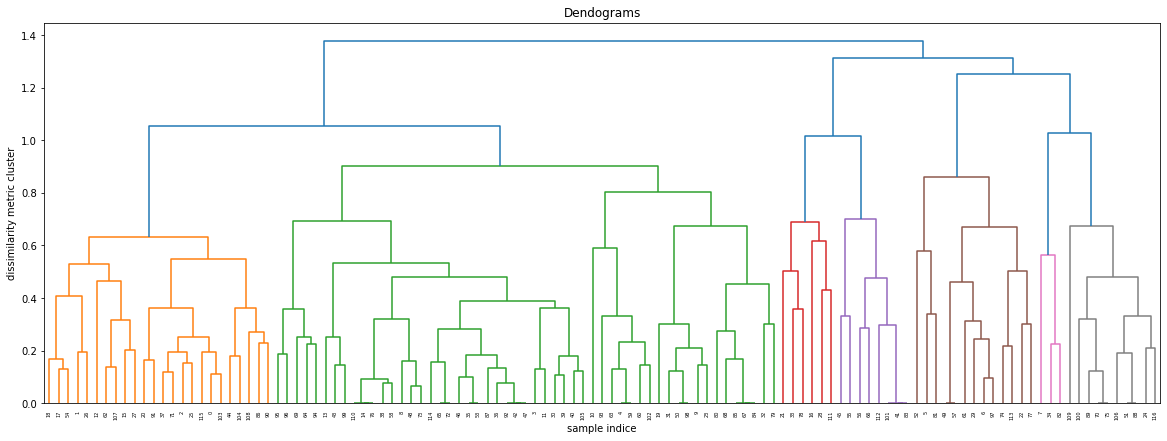

In [ ]:
plt.figure(figsize=(20, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='complete'))
plt.xlabel('sample indice')
plt.ylabel('dissimilarity metric cluster')

<ipython-input-9-f01e928d6b9c>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(X[:,0], X[:,1], lw=0, s=150, c=palette[labels.astype(np.int)])


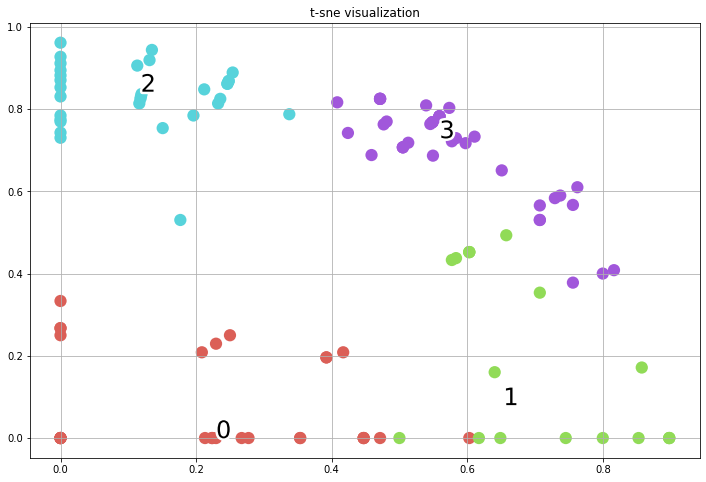

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(X)


_plot_kmean_scatter(X[:, [2, 4]], labels)

<ipython-input-9-f01e928d6b9c>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(X[:,0], X[:,1], lw=0, s=150, c=palette[labels.astype(np.int)])


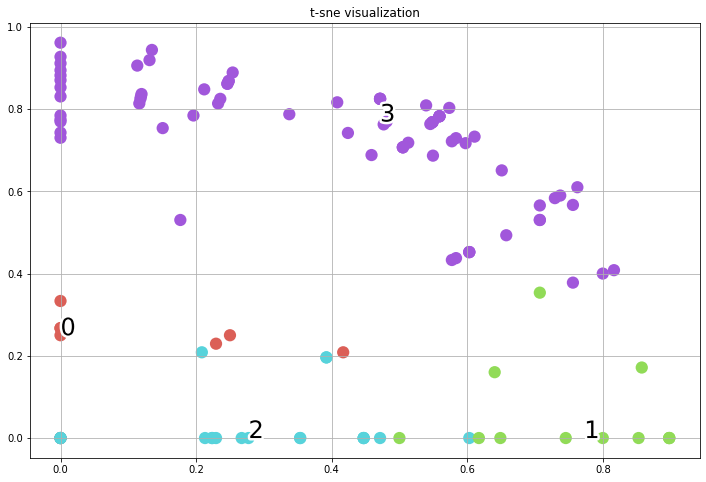

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
labels = cluster.fit_predict(X)


_plot_kmean_scatter(X[:, [2, 4]], labels)

<ipython-input-9-f01e928d6b9c>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(X[:,0], X[:,1], lw=0, s=150, c=palette[labels.astype(np.int)])


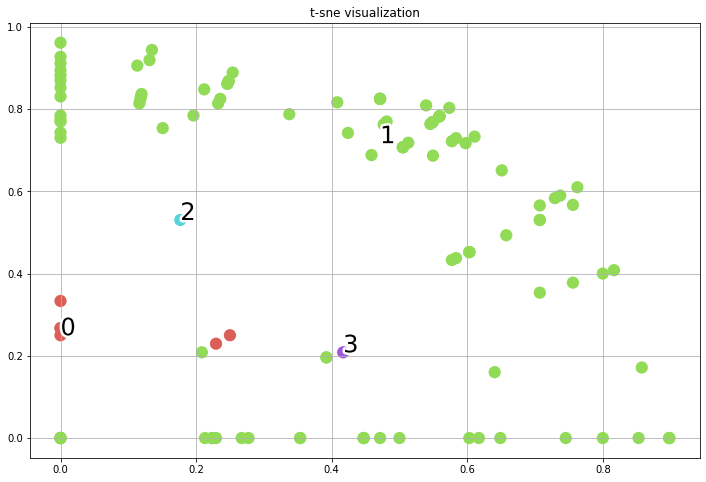

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
labels = cluster.fit_predict(X)

_plot_kmean_scatter(X[:, [2, 4]], labels)

<ipython-input-9-f01e928d6b9c>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(X[:,0], X[:,1], lw=0, s=150, c=palette[labels.astype(np.int)])


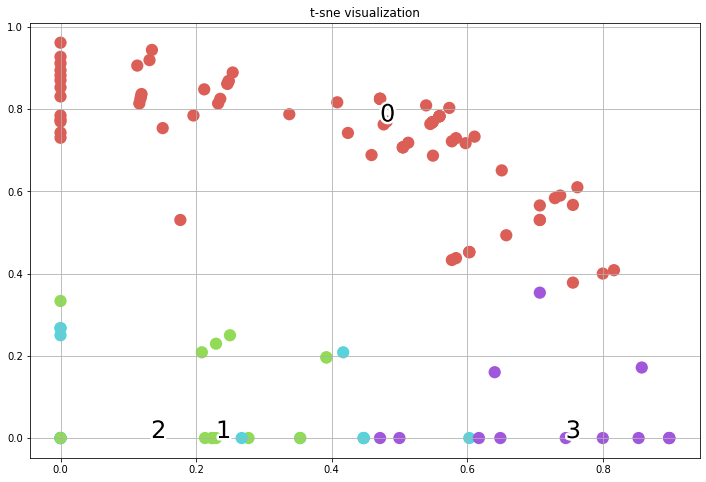

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
labels = cluster.fit_predict(X)

_plot_kmean_scatter(X[:, [2, 4]], labels)

<h1>EVALUATING MODEL USING PCA</h1>

In [ ]:

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

Y = np.array(df.iloc[:117])

scaler = StandardScaler()
scaler.fit(Y)
scale_my_data = scaler.transform(Y)

for my_data in scale_my_data:
    print(my_data)

[-0.7754048   1.38813357  0.23322372 -1.2119753   1.10347586  0.85010446
  1.17803018]
[-0.7754048   0.58807629 -1.34103641  0.06551218  0.07062246 -2.0328585
  1.17803018]
[-0.7754048   1.38813357 -0.29152966  0.06551218  1.44776033  0.85010446
 -0.84887469]
[ 0.484628   -1.01203827  0.7579771   0.06551218  0.41490692  0.85010446
 -0.84887469]
[ 0.484628    1.38813357  0.7579771   0.06551218 -0.27366201 -0.59137702
 -0.84887469]
[-0.7754048   0.58807629 -0.29152966 -1.2119753  -1.30651542  0.85010446
  1.17803018]
[-0.7754048  -1.01203827  0.7579771   0.06551218 -1.30651542  0.85010446
 -0.84887469]
[-0.7754048  -0.21198099 -1.34103641  1.34299965 -0.96223095 -2.0328585
 -0.84887469]
[ 0.484628    1.38813357  1.28273048 -1.2119753   1.44776033 -0.59137702
  1.17803018]
[ 0.484628   -0.21198099 -0.29152966  1.34299965  1.10347586  0.85010446
 -0.84887469]
[ 1.74466081  1.38813357 -0.81628303  0.06551218 -0.27366201 -0.59137702
 -0.84887469]
[ 0.484628   -1.01203827  0.7579771   0.06551

Eigen values:

[0.15488115 0.44497605 0.53776252 0.64582281 1.57724899 3.4176698
 8.95373418]
Eigen vectors:

[[ 0.00675102 -0.31910472 -0.7050468  -0.61038348 -0.15102826  0.02884625
  -0.06946926]
 [-0.03744693  0.04825858 -0.22478019  0.00465185  0.95687722  0.17337927
   0.00683226]
 [ 0.05193809  0.04341456 -0.02742164 -0.10389369  0.1636014  -0.94632221
   0.24815442]
 [ 0.34272356  0.10009267 -0.61529077  0.68445373 -0.13352183 -0.03613501
   0.07955228]
 [-0.00736565 -0.01226678  0.01145341 -0.09226045 -0.04915463  0.25253225
   0.96175017]
 [ 0.07554821 -0.93920781  0.17015256  0.26549971  0.0975541  -0.0483602
   0.02972648]
 [ 0.93414847  0.04096516  0.20967863 -0.26294006  0.07106316  0.07851628
  -0.03702853]]


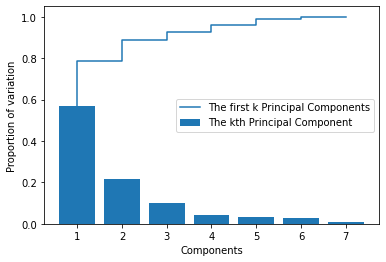

In [ ]:
cov_mat = np.cov(df.T)

eigen_vals, eigen_vects = np.linalg.eigh(cov_mat)
print('Eigen values:\n')
print(eigen_vals)
print('Eigen vectors:\n')
print(eigen_vects)

propor_ith = [(i/np.sum(eigen_vals)) for i in (sorted(eigen_vals, reverse=True))]
propor_k = np.cumsum(propor_ith)

plt.bar(range(1, 8), propor_ith, label='The kth Principal Component')
plt.step(range(1, 8), propor_k, label='The first k Principal Components')
plt.xlabel('Components')
plt.ylabel('Proportion of variation')
plt.legend(loc='best')
plt.show()


In [ ]:
my_pca = PCA(n_components=2)
new_scale_my_data = scale_my_data[np.isfinite(scale_my_data).all(1)]
principalComponents_mine = my_pca.fit_transform(new_scale_my_data)
print(principalComponents_mine.shape)

(117, 2)


Text(0, 0.5, 'dissimilarity metric cluster')

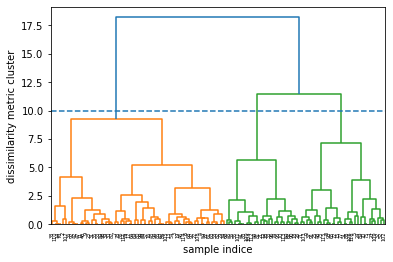

In [ ]:
dend = shc.dendrogram(shc.linkage(principalComponents_mine, method='ward'))
plt.axhline(10, linestyle='--')
plt.xlabel('sample indice')
plt.ylabel('dissimilarity metric cluster')

<ipython-input-9-f01e928d6b9c>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(X[:,0], X[:,1], lw=0, s=150, c=palette[labels.astype(np.int)])


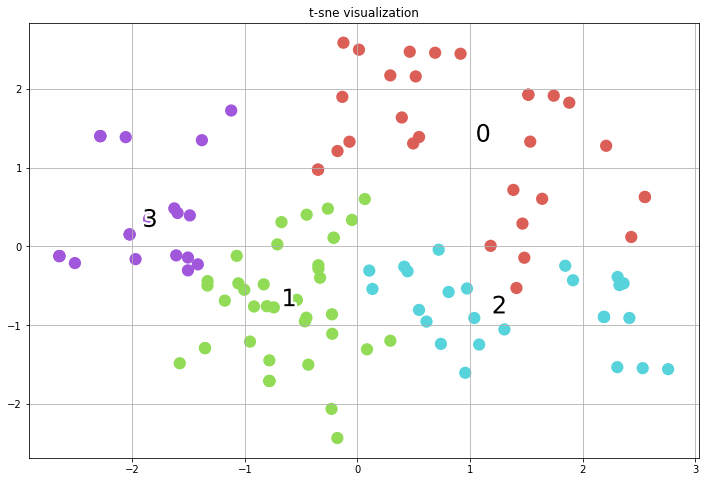

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(principalComponents_mine)

_plot_kmean_scatter(principalComponents_mine, labels)

In [ ]:
principalComponents_mine

array([[ 0.46437696,  2.47373246],
       [ 1.46495346,  0.29078745],
       [-1.12060906,  1.72692806],
       [-1.17724944, -0.68743984],
       [-0.21070868,  0.11104568],
       [ 1.53394311,  1.33151847],
       [-0.83164462, -0.48097496],
       [ 0.08499096, -1.30605442],
       [ 0.54695651,  1.39053841],
       [-1.50442156, -0.30303354],
       [ 0.80944383, -0.5780747 ],
       [-1.50476878, -0.14000385],
       [ 1.08064663, -1.24550047],
       [-0.80355417, -0.75787722],
       [-2.28240888,  1.40174305],
       [-0.17677645,  1.21220483],
       [-0.78187346, -1.44648578],
       [-0.46655627, -0.95092887],
       [ 0.44473394, -0.31463006],
       [-1.33023185, -0.43975017],
       [ 1.63971483,  0.60554754],
       [ 1.03731231, -0.90785934],
       [-0.26245442,  0.48091891],
       [-1.41686726, -0.22716834],
       [ 2.20798615,  1.27899438],
       [-0.13391784,  1.90038267],
       [ 0.41577645, -0.25672997],
       [ 0.06546886,  0.60267916],
       [ 1.30467451,

<ipython-input-9-f01e928d6b9c>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(X[:,0], X[:,1], lw=0, s=150, c=palette[labels.astype(np.int)])


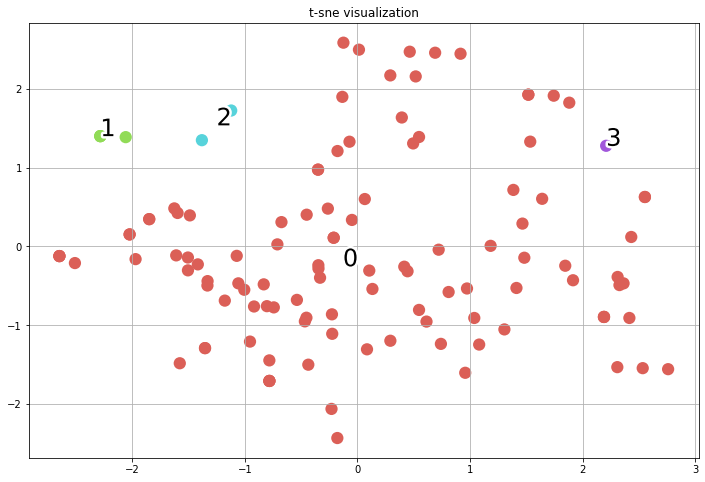

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
labels = cluster.fit_predict(principalComponents_mine)

_plot_kmean_scatter(principalComponents_mine, labels)

<ipython-input-9-f01e928d6b9c>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(X[:,0], X[:,1], lw=0, s=150, c=palette[labels.astype(np.int)])


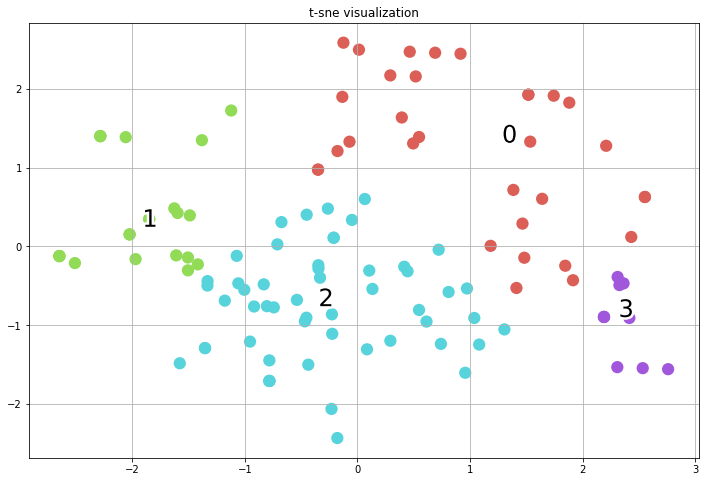

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
labels = cluster.fit_predict(principalComponents_mine)

_plot_kmean_scatter(principalComponents_mine, labels)

<ipython-input-9-f01e928d6b9c>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(X[:,0], X[:,1], lw=0, s=150, c=palette[labels.astype(np.int)])


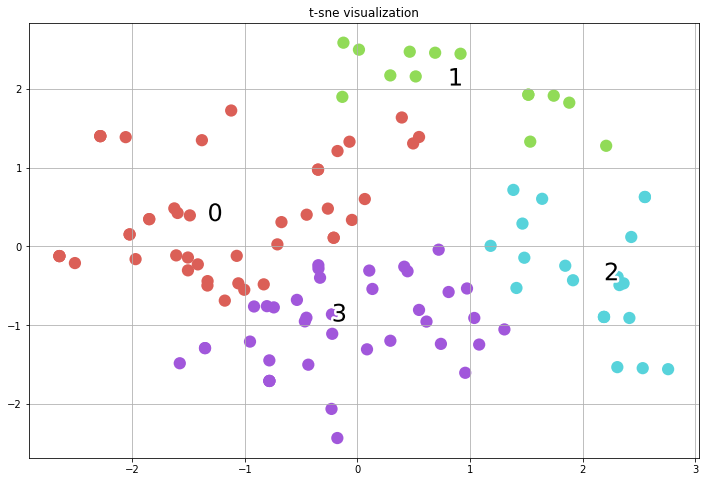

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
labels = cluster.fit_predict(principalComponents_mine)

_plot_kmean_scatter(principalComponents_mine, labels)

In [ ]:
df

,Gender,Year of Studying,Operating time per day,Reason,Category,Device,Alone/Friend
0,0,4,3,0,7,2,1
1,0,3,0,1,4,0,1
2,0,4,2,1,8,2,0
3,1,1,4,1,5,2,0
4,1,4,4,1,3,1,0
...,...,...,...,...,...,...,...
112,2,2,1,0,0,2,1
113,2,4,4,2,0,1,1
114,0,1,5,0,7,1,0
115,0,4,2,1,7,1,1


<h1>EDA</h1>

<ipython-input-29-a7488222bd1d>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gender_af[row, col] = df[df['Gender'] == row][df['Alone/Friend'] == col].shape[0]


[[42. 26.]
 [14. 12.]
 [12. 11.]]


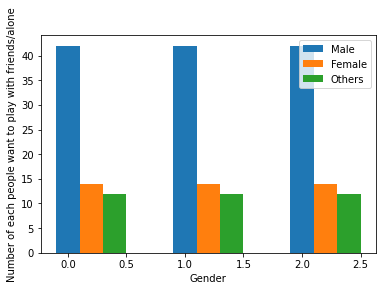

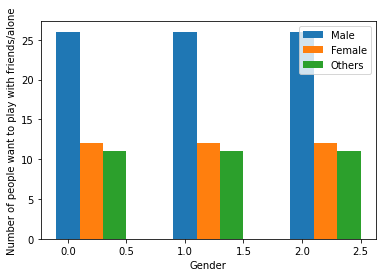

In [ ]:
# male_af = df[df['Gender'] == 0][df['Alone/Friend'] == 0]
# male_af.shape[0]

"""
GENDER X ALONE/FRIEND
    GENDER: 0/1: Male/Female
    ALONE/FRIEND: 0/1: Alone/Friend
"""
features = ['Male', 'Female', 'Others']
gender_af = np.zeros((len(np.unique(df['Gender'])), len(np.unique(df['Alone/Friend']))))
for row in range(len(gender_af)):
    for col in range(len(gender_af[0])):
        gender_af[row, col] = df[df['Gender'] == row][df['Alone/Friend'] == col].shape[0]

print(gender_af)

width = 0.2

fig1 = plt.figure(1)
plt.bar(np.arange(len(features)) , gender_af[0, 0], width=width, label='Male')
plt.bar(np.arange(len(features)) + width, gender_af[1, 0], width=width, label='Female')
plt.bar(np.arange(len(features)) + 2*width, gender_af[2, 0], width=width, label='Others')
plt.ylabel('Number of each people want to play with friends/alone')
plt.xlabel('Gender')
plt.legend()

fig2 = plt.figure(2)
plt.bar(np.arange(len(features)) , gender_af[0, 1], width=width, label='Male')
plt.bar(np.arange(len(features)) + width, gender_af[1, 1], width=width, label='Female')
plt.bar(np.arange(len(features)) + 2*width, gender_af[2, 1], width=width, label='Others')
plt.ylabel('Number of people want to play with friends/alone')
plt.xlabel('Gender')
plt.legend()


plt.show()

In [ ]:
Z = np.array(df.iloc[: ,1 : 3]).astype(np.float32)

In [ ]:
Z

array([[4., 3.],
       [3., 0.],
       [4., 2.],
       [1., 4.],
       [4., 4.],
       [3., 2.],
       [1., 4.],
       [2., 0.],
       [4., 5.],
       [2., 2.],
       [4., 1.],
       [1., 4.],
       [2., 0.],
       [1., 5.],
       [4., 5.],
       [3., 1.],
       [1., 2.],
       [2., 0.],
       [2., 0.],
       [1., 1.],
       [2., 0.],
       [1., 0.],
       [4., 4.],
       [2., 1.],
       [4., 1.],
       [4., 1.],
       [3., 0.],
       [2., 0.],
       [2., 0.],
       [2., 4.],
       [2., 5.],
       [1., 2.],
       [1., 2.],
       [2., 0.],
       [3., 1.],
       [1., 5.],
       [1., 5.],
       [4., 1.],
       [4., 4.],
       [2., 5.],
       [1., 5.],
       [1., 1.],
       [1., 5.],
       [1., 5.],
       [2., 0.],
       [1., 0.],
       [1., 4.],
       [1., 5.],
       [4., 5.],
       [1., 5.],
       [2., 2.],
       [4., 2.],
       [1., 2.],
       [1., 5.],
       [2., 0.],
       [1., 0.],
       [1., 1.],
       [1., 5.],
       [2., 2.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


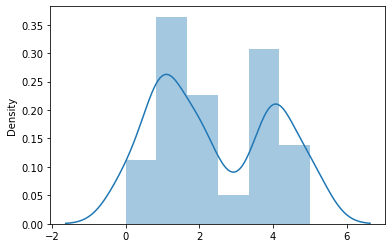

In [ ]:

sns.distplot(Z)

In [ ]:
F = np.array(df.iloc[: ,3 : 7]).astype(np.float32)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


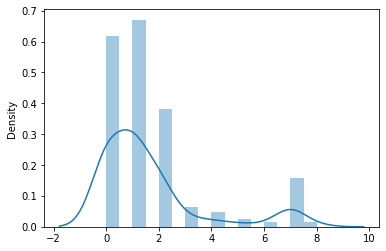

In [ ]:
sns.distplot(F)

<ipython-input-35-6b9dd46970a3>:5: ConvergenceWarning: Number of distinct clusters (102) found smaller than n_clusters (103). Possibly due to duplicate points in X.
  kmeans.fit(df)
<ipython-input-35-6b9dd46970a3>:5: ConvergenceWarning: Number of distinct clusters (102) found smaller than n_clusters (104). Possibly due to duplicate points in X.
  kmeans.fit(df)
<ipython-input-35-6b9dd46970a3>:5: ConvergenceWarning: Number of distinct clusters (102) found smaller than n_clusters (105). Possibly due to duplicate points in X.
  kmeans.fit(df)
<ipython-input-35-6b9dd46970a3>:5: ConvergenceWarning: Number of distinct clusters (102) found smaller than n_clusters (106). Possibly due to duplicate points in X.
  kmeans.fit(df)
<ipython-input-35-6b9dd46970a3>:5: ConvergenceWarning: Number of distinct clusters (102) found smaller than n_clusters (107). Possibly due to duplicate points in X.
  kmeans.fit(df)
<ipython-input-35-6b9dd46970a3>:5: ConvergenceWarning: Number of distinct clusters (102) f

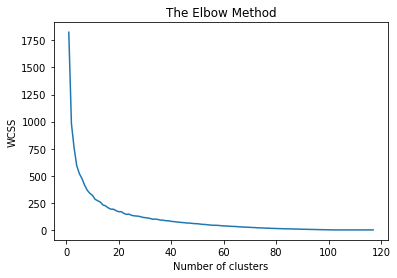

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 118):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 118), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

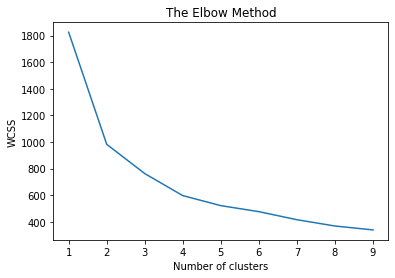

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
wcss

[1824.9230769230771,
 981.990029325513,
 761.8686217008799,
 596.0567145862551,
 520.7107215365281,
 475.5372346189281,
 414.8234071484071,
 367.5449125264141,
 338.17656926406926]

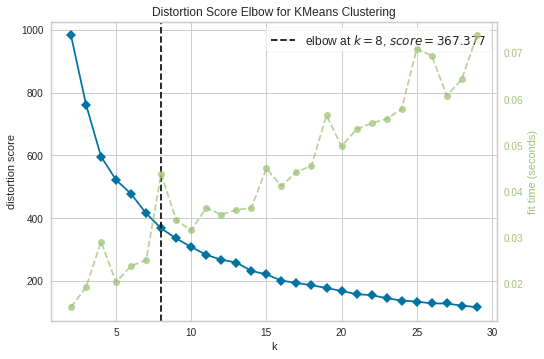

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
kmeans.inertia_

338.17656926406926

In [ ]:
AgglomerativeX = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_AgglomerativeX = AgglomerativeX.fit_predict(df)
df['Cluster'] = y_AgglomerativeX

In [ ]:
df

,Gender,Year of Studying,Operating time per day,Reason,Category,Device,Alone/Friend,Cluster
0,0,4,3,0,7,2,1,0
1,0,3,0,1,4,0,1,0
2,0,4,2,1,8,2,0,0
3,1,1,4,1,5,2,0,1
4,1,4,4,1,3,1,0,1
...,...,...,...,...,...,...,...,...
112,2,2,1,0,0,2,1,2
113,2,4,4,2,0,1,1,1
114,0,1,5,0,7,1,0,3
115,0,4,2,1,7,1,1,0


In [ ]:
result_df = df.groupby(['Cluster'])
result_df.head(100)

,Gender,Year of Studying,Operating time per day,Reason,Category,Device,Alone/Friend,Cluster
0,0,4,3,0,7,2,1,0
1,0,3,0,1,4,0,1,0
2,0,4,2,1,8,2,0,0
3,1,1,4,1,5,2,0,1
4,1,4,4,1,3,1,0,1
...,...,...,...,...,...,...,...,...
112,2,2,1,0,0,2,1,2
113,2,4,4,2,0,1,1,1
114,0,1,5,0,7,1,0,3
115,0,4,2,1,7,1,1,0


In [ ]:
df = df.values
_plot_kmean_scatter(result_df, y_AgglomerativeX)

AttributeError: ignored